<a href="https://colab.research.google.com/github/soorajrajivekumar/group8/blob/main/Project_1_G9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Importing required libraries and modules

In [ ]:
import pandas as pd                                                        #imports the 'pandas' anaconda pack with the variable (pandas is the package that handles data)
og_df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')                      #copies the info from the data sheet provided into code for supervised learning
og_df.head()                                                                #function that cuts short the 7000 rows into just 5 rows, if needed rows can be edited as per choice

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Step 2: Checking for null values

Step 3: Removing erroneous values

'TotalCharges' was a numeric column with elements encoded as strings. Certain elements were empty(' ') and were providing errors. The same has been fixed below and the elements have been converts to float64, and can hence be normalized and treated as numbers.

In [ ]:
import numpy as np                                                      #mainly used for mathemical operations but it can also be used for other things, numpy is imported with the variable name 'np'
ls1 = []                                                                #This line initializes an empty list called "ls1". This list will be used to store the indices of elements in the 'TotalCharges' column of the DataFrame that have a value of ' '.
for i in range(0,len(np.array(og_df['TotalCharges']))):                    #This line starts a for loop that iterates over the range of indices from 0 to the length of the 'TotalCharges' column of the DataFrame. It uses NumPy's array() function to convert the 'TotalCharges' column into a NumPy array.
  if np.array(og_df['TotalCharges'][i]) == ' ':                            #This line checks if the value at index i in the 'TotalCharges' column is equal to a blank space (' ').
              ls1.append(i)                                             #If the value at index i is a blank space, this line appends the index i to the list ls1. Append is a function that adds an element to the list
ls1                                                                     #Finally, the code returns the list ls1, which contains the indices of elements in the 'TotalCharges' column that have a value of ' 'and the code resets
og_df.drop(ls1,inplace=True)                                               #remove rows from a DataFrame based on the indices specified in the list ls1, drop is a method that is included in the 'pandas' package which was implemented before in the previous cells (it is used to remove rows or columns).
og_df['TotalCharges'] = pd.to_numeric(og_df['TotalCharges'], errors='coerce') # this function used to convert the values in the 'TotalCharges' column of the DataFrame df to numeric data type. The errors='coerce' parameter specifies that if any conversion errors occur, the corresponding values should be set to NaN (Not a Number)

In [ ]:
og_df.info() #The df.info() method in Pandas provides a summary of the DataFrame's structure and content. It is a useful tool for quickly understanding the dataset and gaining insights into its characteristics
ls = []
for i in og_df.columns:
  if og_df[i].dtype == 'object':
    ls.append(i)
ls

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

Step 4: Converting categorical data to numerical. Instead of One Hot Encoding, values were simply replaced by 0,1 and 2 labels in the same column itself

In [ ]:
#df['gender'].replace(['Female', 'Male'], [0, 1], inplace=True) # converts female and male in gender column to 0 and 1 respectively

In [ ]:
#df['Partner'].replace(['Yes', 'No'], [1, 0], inplace=True) #replaces values of yes and no in partner column with 1 and 0 respectively

In [ ]:
#df['Dependents'].replace(['Yes', 'No'], [1, 0], inplace=True)

In [ ]:
#df['PhoneService'].replace(['Yes', 'No'], [1, 0], inplace=True)

In [ ]:
#df['MultipleLines'].replace(['Yes', 'No','No phone service'], [1, 0, 2], inplace=True)


In [ ]:
#df['InternetService'].replace(['DSL', 'Fiber optic','No'], [1, 2, 0], inplace=True)

In [ ]:
#df['OnlineSecurity'].replace(['Yes', 'No internet service','No'], [1, 2, 0], inplace=True)

In [ ]:
#df['TechSupport'].replace(['Yes', 'No internet service','No'], [1, 2, 0], inplace=True)

In [ ]:
#df['DeviceProtection'].replace(['Yes', 'No internet service','No'], [1, 2, 0], inplace=True)

In [ ]:
#df['StreamingTV'].replace(['Yes', 'No internet service','No'], [1, 2, 0], inplace=True)

In [ ]:
#df['StreamingMovies'].replace(['Yes', 'No internet service','No'], [1, 2, 0], inplace=True)

In [ ]:
#df['OnlineBackup'].replace(['Yes', 'No internet service','No'], [1, 2, 0], inplace=True)

In [ ]:
#df['Contract'].replace(['Month-to-month', 'One year','Two year'], [0, 1, 2], inplace=True)

In [ ]:
#df['PaperlessBilling'].replace(['Yes', 'No'], [1, 0], inplace=True)

In [ ]:
#df['PaymentMethod'].replace(['Credit card (automatic)', 'Bank transfer (automatic)', 'Mailed check', 'Electronic check'], [0, 1, 2 , 3], inplace=True)

In [ ]:
#df['Churn'].replace(['Yes', 'No'], [1, 0], inplace=True)
#df.head()

from sklearn.preprocessing import OneHotEncoder
og_df = og_df.drop('customerID',axis=1)
cat_features = og_df.select_dtypes(include=['object']).columns

df = pd.get_dummies(og_df, columns=cat_features, drop_first=True)

df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


Step 5: Normalization (We tried normalizing data using MinMaxScaler() and the mean normalization formula. Eventually, the mean_normalization provided more promising results. The below code showcases both techniques

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler() #instance creation
#norm_col = scaler.fit_transform(df[['TotalCharges','tenure','MonthlyCharges']]) #The fit_transform() method fits the scaler to the data and then transforms the columns by scaling them using the min-max scaling technique(scaled_value = (value - min_value) / (max_value - min_value)).
#df['TotalCharges'] = norm_col[:,0] #  assigns the scaled values from the first column of norm_col back to the 'TotalCharges' column
#df['tenure'] = norm_col[:,1] # assigns the scaled values from the second column of norm_col back to the 'tenure' column
#df['MonthlyCharges'] = norm_col[:,2] # assigns the scaled values from the third column of norm_col back to the 'MonthlyCharges' column
#df.head() #trims and displays rows

In [ ]:
def mean_normalize(col):                                #defining the function and creating it, the variable col is of 'series' type which is the python equivalent of java's 'array' data type
  norm_column = (col-col.mean())/(col.max()-col.min())     #predefined formula to normalize values
  return norm_column                                               #returns the value calculated in the normalize formula

In [ ]:
df['TotalCharges'] = mean_normalize(df['TotalCharges']) #all these values are being normalized by calling the function defined previously
df['tenure'] = mean_normalize(df['tenure'])
df['MonthlyCharges'] = mean_normalize(df['MonthlyCharges'])

Step 6: Feature Selection using a heatmap to determine correlation with different feature variables with respect to 'Churn' or the target.

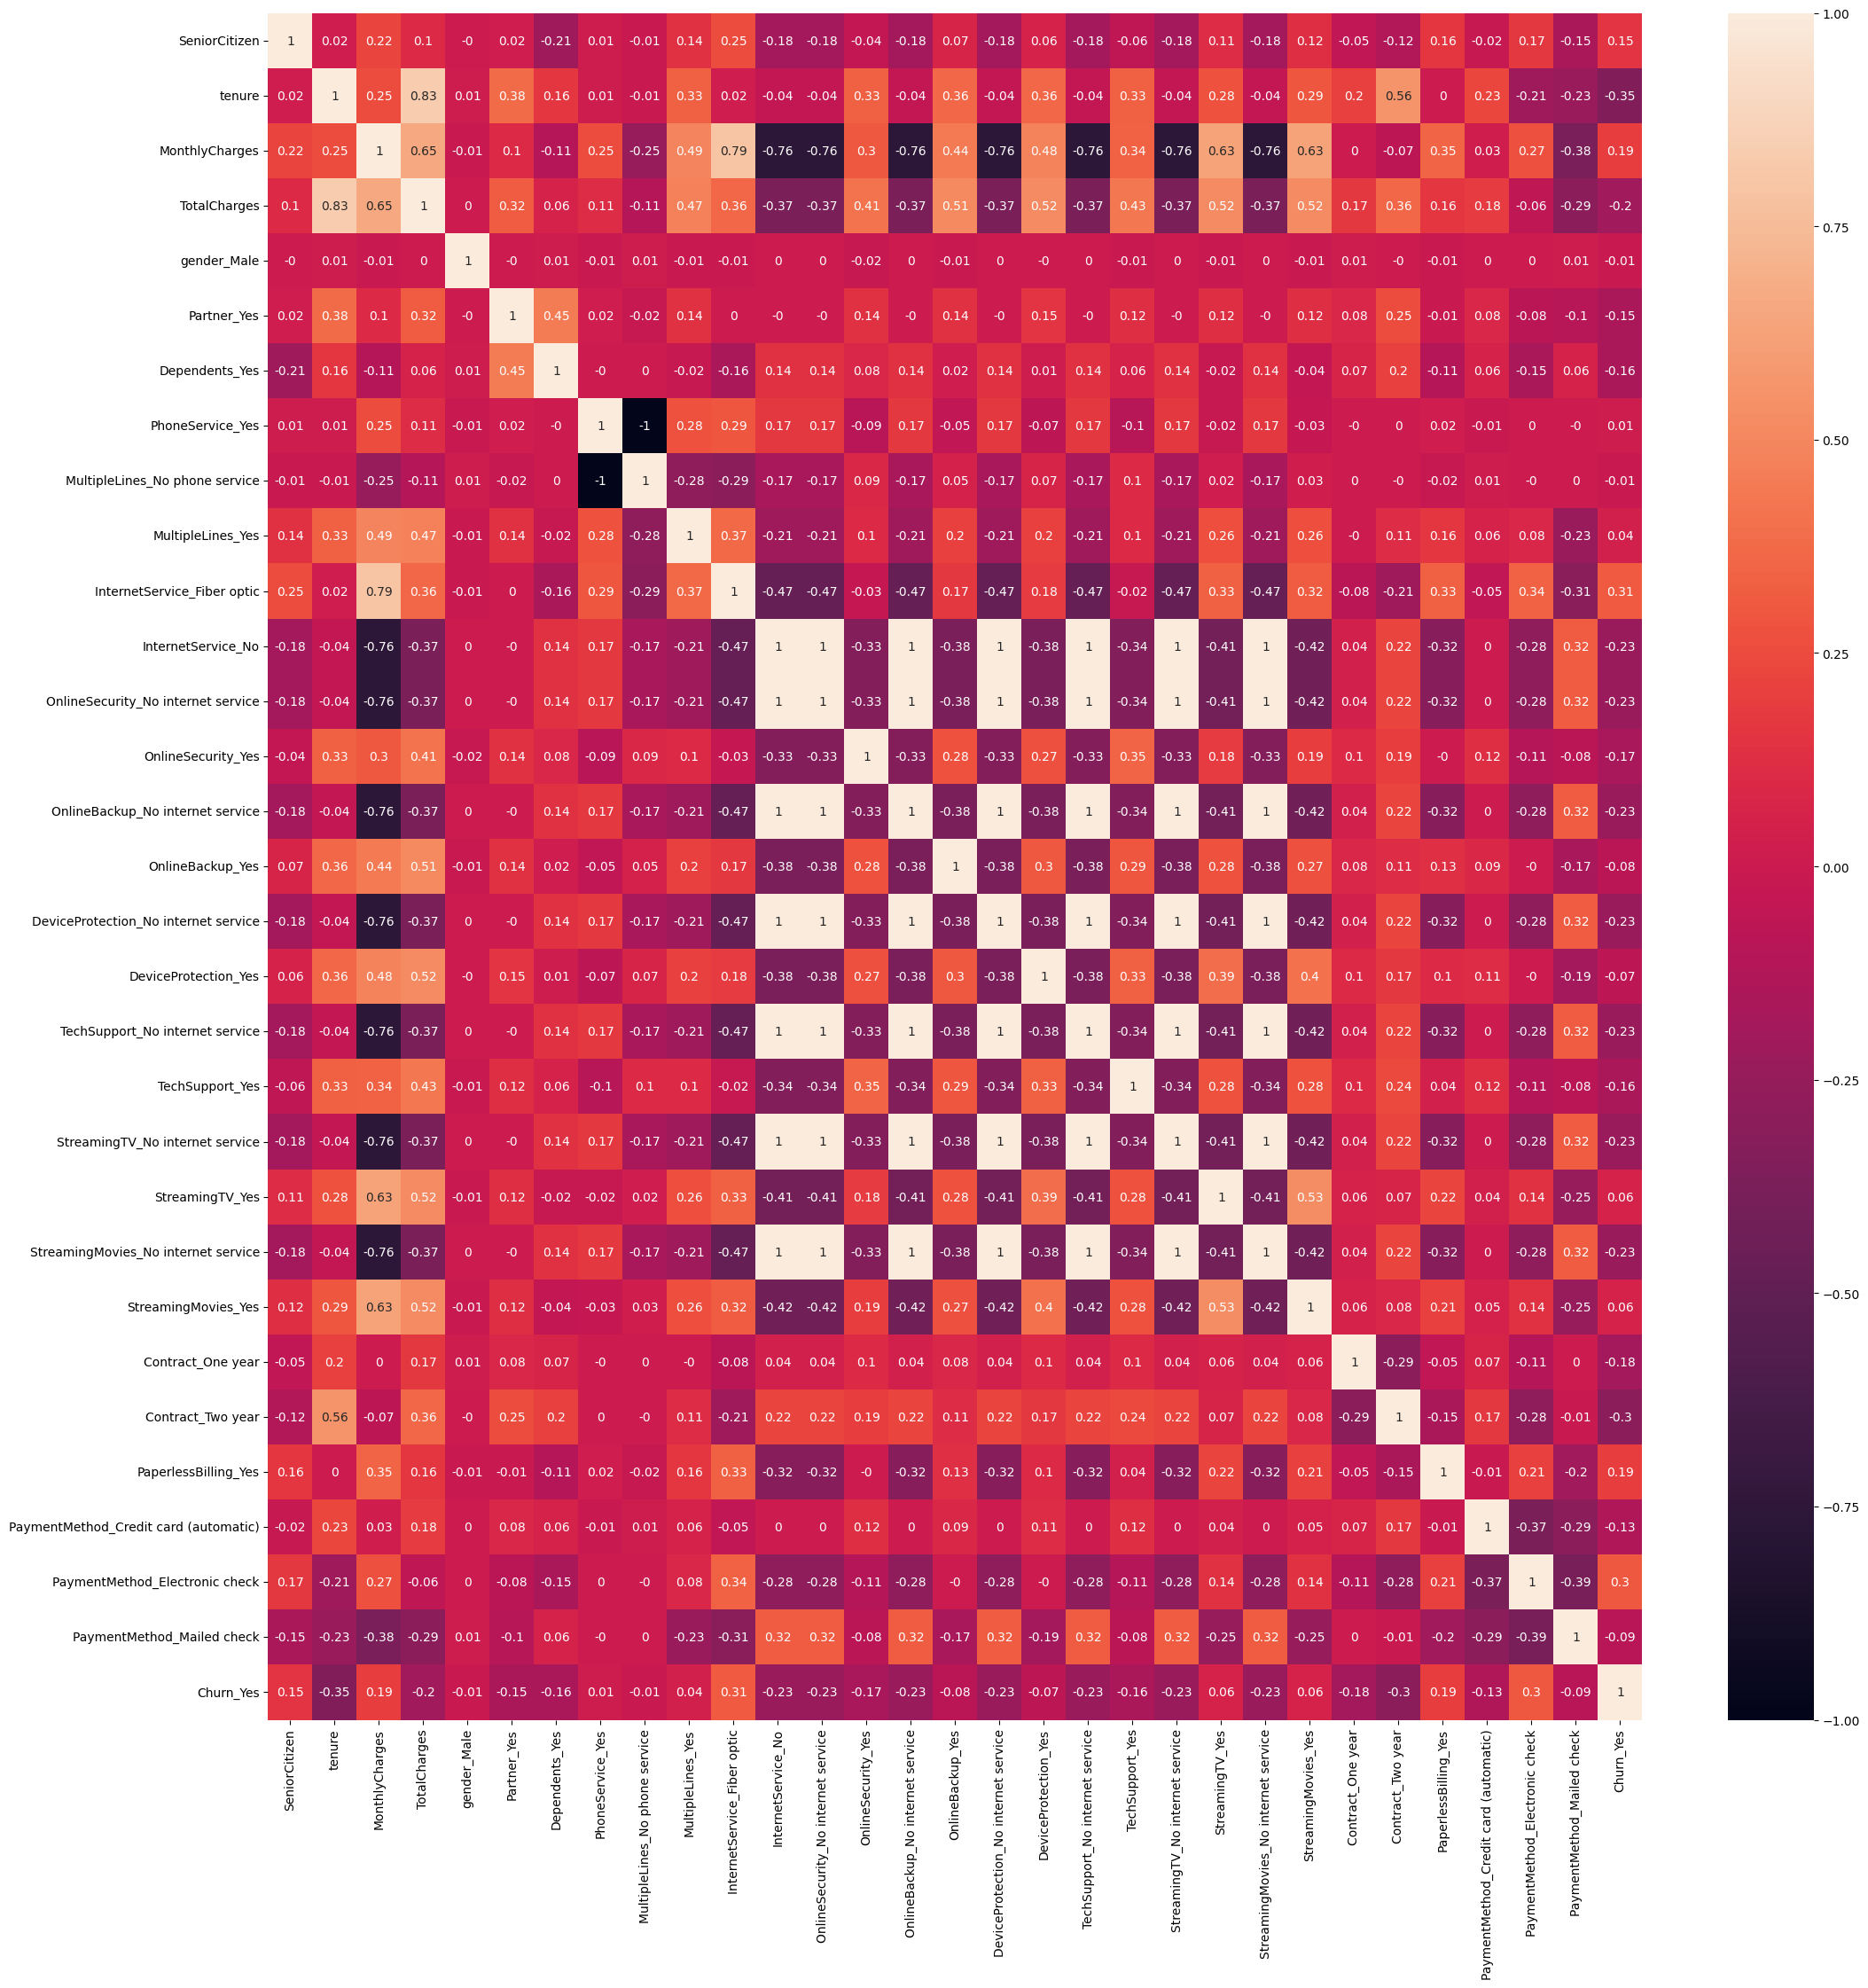

In [ ]:
import matplotlib.pyplot as plt                                                               #imports the pyplot module from the matplotlib as 'plt', usually used for creating visual stuff
import seaborn as sns                                                              #line imports the seaborn library, which is a data visualization library built on top of matplotlib, used to create the graph below
plt.figure(figsize=(25,25))                                                                #makes a 15x15 table
sns.heatmap(df.corr().round(2),annot=True)                                              #this function generates a heat map from the packages above. corr() method calculates the pairwise correlation between columns in df. The .round(2) call rounds the correlation values to two decimal places
plt.show()                                                                           # displays heatmap

Step 7: KMeans clustering (3-dimensional)
Since most data is categorical in nature, KMeans would be ineffective. The code box show cases a plot with 3 numerical factors (tenure, total charges, and monthly charges), which are not as effective indicators and thus again fail to show clear detection.

In [ ]:
df2 = df.iloc[:,1:-1] #This line creates a new DataFrame df2 by indexing df with a list of column names mentioned in [] brackets. Double square brackets are used for selecting multiple columns
og_df['Churn'].replace(['Yes', 'No'], [1, 0], inplace=True)
target = og_df['Churn']                                  #line creates a new Series target by indexing df with the column name 'Churn'.
df2.head()                                            #shows first few rows rather than all 7000

,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.442560,-0.347743,-0.260034,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0.022228,-0.078092,-0.045442,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,-0.428476,-0.108937,-0.250998,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0.177158,-0.223863,-0.051067,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,-0.428476,0.058724,-0.245979,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
from sklearn.cluster import KMeans                                                              # line imports the KMeans class from the sklearn.cluster module
from sklearn.model_selection import train_test_split                                            #This line imports the train_test_split function from the sklearn.model_selection module. train_test_split is used to split the data into training and testing subsets for model evaluation.
from sklearn.metrics import accuracy_score                                                      # line imports the accuracy_score function from the sklearn.metrics module. accuracy_score is a metric used to evaluate the accuracy of classification models.
x_traink,x_testk,y_traink,y_testk = train_test_split(df2,target,test_size=0.3,random_state=15)  # This line splits the features in df2 (x) and the target variable target (y) into training and testing sets.
kmeans_3d = KMeans(n_clusters=2)                                                                #instance of the KMeans class is created with n_clusters=2 which means that program should identify 2 clusters
kmeans_3d.fit(x_traink,y_traink)                                                                #KMeans model is being fit to the training data. The fit method is called with the training features (x_traink) and the corresponding target variable (y_traink).
y_testk_pred = kmeans_3d.predict(x_testk)                                                       #Now that Kmeans has been trained it can predict cluster assignments for testing
accuracy_score(y_testk,y_testk_pred)                                                            # accuracy of prediction is being calculated by comparing it to the true labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.5710900473933649

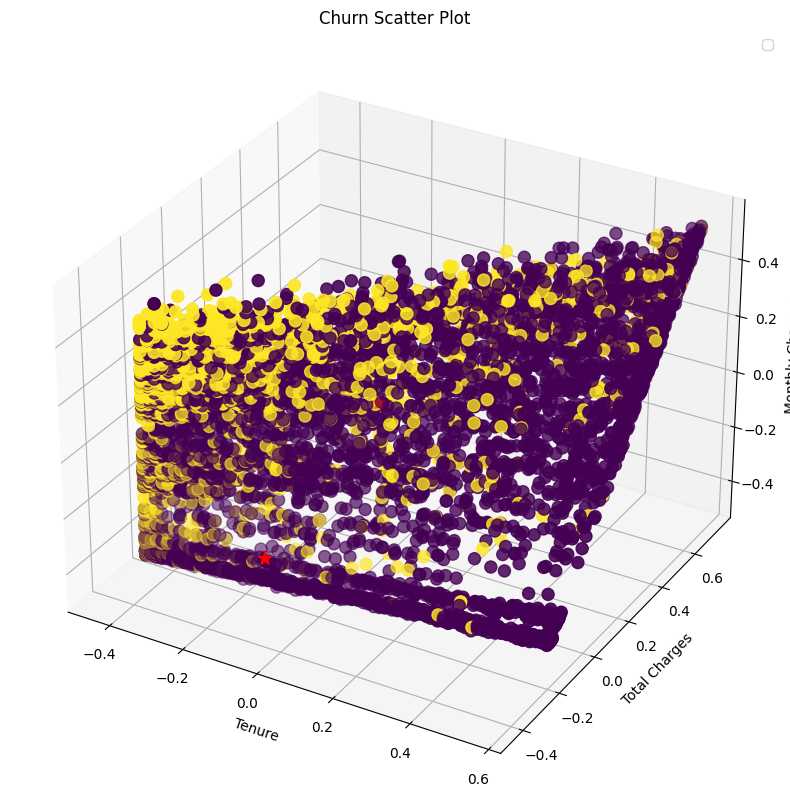

In [ ]:
import matplotlib.pyplot as plt
centre = kmeans_3d.cluster_centers_                                                       #this line of code retrieves the centroids obtained from the trained KMeans model and assigns them to a variable centre
fig = plt.figure(figsize = (10,10))                                                       #makes a 10x10 inch figure
ax = plt.axes(projection='3d')                                                            #makes a 3d graph as you can see in output below
ax.scatter(df2['tenure'],df2['TotalCharges'],df2['MonthlyCharges'],c=target, s = 75)      #line creates a scatter plot in 3D. It plots the features 'tenure', 'TotalCharges', and 'MonthlyCharges' from df2 on the respective axes of the scatter plot.
ax.scatter(centre[:,0],centre[:,1],centre[:,2],c = 'red',marker='*',s=100)                #This line adds scatter plot markers to the 3D axes ax for the cluster centers (centre). The cluster centers are plotted as red markers (c='red') with a '*' marker shape and size s=100
ax.set_title('Churn Scatter Plot')                                                        #sets title
ax.set_xlabel('Tenure')                                                                   #sets X axis to age
ax.set_ylabel('Total Charges')                                                            #sets y axis to annual income
ax.set_zlabel('Monthly Charges')                                                          #sets z axis to spending score
plt.legend()                                                                              #displays a legend
plt.show()                                                                                #displays the plot

In [ ]:
import plotly.express as px #line imports the plotly.express module, which provides a high-level interface for creating interactive visualizations using Plotly
fig = px.scatter_3d(df2,x='tenure',y='TotalCharges',z='MonthlyCharges',color = target) # line creates a 3D scatter plot using the scatter_3d function from plotly.express. It takes the DataFrame df2 as input and specifies the columns 'tenure', 'TotalCharges', and 'MonthlyCharges' as the x, y, and z coordinates, respectively. The color parameter is set to target to color the data points based on their values
fig.show() #prints the 3D interactive graph

In [ ]:
x = df2
y = og_df['Churn']


from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=10)

model = LinearRegression()
model.fit(x_train,y_train)
y_test_pred = model.predict(x_test)
y_test_pred = y_test_pred.astype(int)

print('Linear Regression accuracy on testing(unseen) data:')
print()
print(accuracy_score(y_test,y_test_pred)*100,'% accuracy')
print()
print()
print('Confusion Matrix:')
print()
print(confusion_matrix(y_test,y_test_pred))
print()
print()
print('Classification report:')
print()
print(classification_report(y_test,y_test_pred))

Linear Regression accuracy on testing(unseen) data:

73.50710900473933 % accuracy


Confusion Matrix:

[[1551    0]
 [ 559    0]]


Classification report:

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1551
           1       0.00      0.00      0.00       559

    accuracy                           0.74      2110
   macro avg       0.37      0.50      0.42      2110
weighted avg       0.54      0.74      0.62      2110



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Testing accuracy:  0.8005687877710629


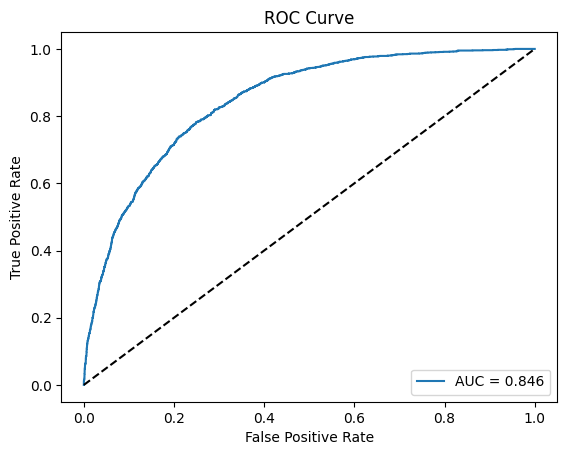

In [ ]:
x = df2
y = og_df['Churn']

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x,y)
y_train_pred = model.predict(x)
y_train_pred = y_train_pred.astype(int)

accuracy_score(y,y_train_pred)
#---------------------#
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

x = df2
y = og_df['Churn']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=42)

model = LogisticRegression()
model.fit(x_train, y_train)

y_test_pred = model.predict(x_test)
print('Testing accuracy: ', accuracy_score(y_test,y_test_pred))
# Get predicted probabilities for positive class
y_train_prob = model.predict_proba(x)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y, y_train_prob)

# Compute AUC score
auc_score = roc_auc_score(y, y_train_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
dtree_features = df2
dtree_target = og_df['Churn']
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
xtrain_dtc,xtest_dtc,ytrain_dtc,ytest_dtc = train_test_split(dtree_features,dtree_target,test_size=0.3,random_state=15)
dtree_model = DecisionTreeClassifier(random_state = 30)
dtree_model.fit(xtrain_dtc,ytrain_dtc)
ytest_dtc_pred = dtree_model.predict(xtest_dtc)
accuracy_score(ytest_dtc,ytest_dtc_pred)

0.7241706161137441

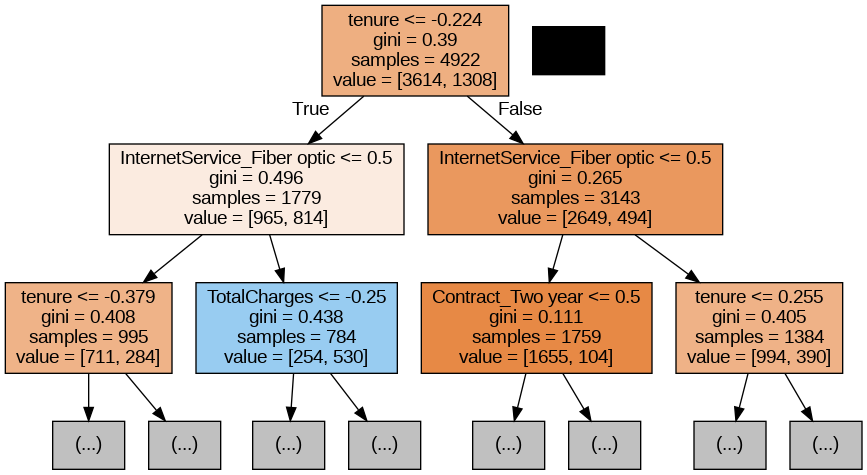

In [ ]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(decision_tree = dtree_model,out_file= dot_data, filled = True, feature_names = df2.columns, max_depth=2)
g = pydotplus.graph_from_dot_data(dot_data.getvalue())
g.write_png('CCT.png')
Image(g.create_png())

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs = 70,n_estimators=300,max_depth=50,max_features=4)
rfc.fit(xtrain_dtc,ytrain_dtc)
rfc_ytest_pred = rfc.predict(xtest_dtc)
accuracy_score(ytest_dtc,rfc_ytest_pred)

0.7815165876777251

In [ ]:
#ANN:
df.head()
print(df.columns)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')


**ARTIFICIAL NEURAL NETWORK: **

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

x = df2
y = og_df['Churn']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 40)

model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
#model.add(Dense(4, activation='relu'))
model.add(Dense(8, activation='relu'))
#model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
# Convert data types if necessary
x_train = x_train.astype('float32')
y_train = y_train.astype('float32')
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')
x_train = x_train[:, :8]
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(x_train, y_train, epochs=10, batch_size=3, verbose=1)
#model.fit(Xtr, ytr, epochs=150, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(x_test[:,:8], y_test, verbose=0)
# _, accuracy = model.evaluate(Xtst, ytst)
print('Accuracy: %.2f ' % (accuracy*100))


Epoch 1/10
1641/1641 [==============================] - 4s 2ms/step - loss: 0.4946 - accuracy: 0.7599
Epoch 2/10
1641/1641 [==============================] - 3s 2ms/step - loss: 0.4460 - accuracy: 0.7885
Epoch 3/10
1641/1641 [==============================] - 6s 4ms/step - loss: 0.4433 - accuracy: 0.7885
Epoch 4/10
1641/1641 [==============================] - 8s 5ms/step - loss: 0.4414 - accuracy: 0.7936
Epoch 5/10
1641/1641 [==============================] - 7s 4ms/step - loss: 0.4408 - accuracy: 0.7909
Epoch 6/10
1641/1641 [==============================] - 3s 2ms/step - loss: 0.4405 - accuracy: 0.7885
Epoch 7/10
1641/1641 [==============================] - 3s 2ms/step - loss: 0.4388 - accuracy: 0.7905
Epoch 8/10
1641/1641 [==============================] - 4s 2ms/step - loss: 0.4394 - accuracy: 0.7909
Epoch 9/10
1641/1641 [==============================] - 3s 2ms/step - loss: 0.4392 - accuracy: 0.7920
Epoch 10/10
1641/1641 [==============================] - 5s 3ms/step - loss: 0.437

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Create X and y variables

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

# Create the SVC model
svc_model = SVC(kernel = 'poly',C=30,degree=25,cache_size=400)
svc_model.fit(X_train, y_train)
print(f"Accuracy score: {svc_model.score(X_train, y_train) * 100}%\n")

#  Make predictions on the train dataset using the 'predict()' function.
# Compute the predictions
svc_y_train_pred = pd.Series(svc_model.predict(X_train))

# Print the occurrence of each flower type computed in the predictions.
print(f"Labels identified for the TRAIN set:\n{svc_y_train_pred.value_counts()}\n")

# Make predictions on the test dataset using the 'predict()' function.
# Compute the predictions
svc_y_test_pred = pd.Series(svc_model.predict(X_test))

# Print the occurrence of each flower type computed in the predictions.
print(f"Labels identified for the TEST set:\n{svc_y_test_pred.value_counts()}")

Accuracy score: 91.14837614094672%

Labels identified for the TRAIN set:
0    3755
1     956
dtype: int64

Labels identified for the TEST set:
0    1787
1     534
dtype: int64


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# Label encoding for the target variable
# Reshape input to be [samples, time steps, features] which is required for RNN
X_train = X_train.values.reshape(X_train.shape[0],1,X_train.shape[1])
X_test = X_test.values.reshape(X_test.shape[0],1,X_test.shape[1])

# Define the RNN model
model = Sequential()

model.add(SimpleRNN(100, return_sequences=True, input_shape=(1, X_train.shape[2])))
model.add(Dropout(0.2))

model.add(SimpleRNN(100, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.add(Dense(1, activation='ReLU'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=4, verbose=1, callbacks=[early_stopping])

# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Epoch 1/100
1178/1178 [==============================] - 8s 5ms/step - loss: 4.1223 - accuracy: 0.7328 - val_loss: 4.0539 - val_accuracy: 0.7372
Epoch 2/100
1178/1178 [==============================] - 6s 5ms/step - loss: 4.1223 - accuracy: 0.7328 - val_loss: 4.0539 - val_accuracy: 0.7372
Epoch 3/100
1178/1178 [==============================] - 6s 5ms/step - loss: 4.1223 - accuracy: 0.7328 - val_loss: 4.0539 - val_accuracy: 0.7372
Epoch 4/100
1178/1178 [==============================] - 8s 7ms/step - loss: 4.1223 - accuracy: 0.7328 - val_loss: 4.0539 - val_accuracy: 0.7372
Epoch 5/100
1178/1178 [==============================] - 5s 4ms/step - loss: 4.1223 - accuracy: 0.7328 - val_loss: 4.0539 - val_accuracy: 0.7372
Epoch 6/100
1178/1178 [==============================] - 7s 6ms/step - loss: 4.1223 - accuracy: 0.7328 - val_loss: 4.0539 - val_accuracy: 0.7372
Epoch 7/100
1178/1178 [==============================] - 5s 5ms/step - loss: 4.1223 - accuracy: 0.7328 - val_loss: 4.0539 - val_ac

KeyboardInterrupt: ignored